# UNIVERSIDAD NACIONAL DE CÓRDOBA#
## Fa.M.A.F – Observatorio Astronómico ##
### Licenciatura en Astronomía ###
### Tapia Martina ###
### Astrometría 2020 ###
## Práctico N° 3: Bases  de  Datos ##

## Introducción ##

Debido a que las nuevas tecnologías aportan cantidades significativas de datos, se hace imperiosa la necesidad de almacenar los mismos de manera que su acceso sea eficiente y útil. En general, la información de grandes relevamientos, simulaciones numéricas, etc. está organizada en Bases de Datos. El paradigma más utilizado para organizar bases de datos es el de *Base de Datos Relacional*. En este tipo de modelo la información se organiza en tablas, que se relacionan entre sí a partir de una propiedad de los datos. Cada tabla es un conjunto de registros. Existen programas o sistemas de gestión de bases de datos relacionales. Entre los más conocidos, se destacan por ejemplo MySQL, PostgreSQL, Oracle y Microsoft SQL Server.   
El **objetivo** de este trabajo es lograr una familiarización con el manejo de las bases de datos, pudiendo extraer información, procesar y analizar la misma con diferentes métodos y principios de probabilidad y estadística. 

## Conceptos básicos ## 
Algunas definiciones importantes para el desarrollo de las actividades de este práctico son: 

- **Base de datos:** Conjunto de datos pertenecientes a un mismo contexto y almacenados sistemáticamente para su registro.
- **Tabla:** Es un conjunto de datos con ciertas características en común.
- **Registro:** Es un objeto único de datos implícitamente estructurados en una tabla. Corresponde a una fila en las tablas.
- **Campo:** Es la mínima unidad de información a la que se puede acceder. Corresponde a una columna de una tabla.
- **Relación Vínculo entre los campos de distintas tablas:** La información está organizada en tablas, pero se puede reunir usando vínculos.

### SQL: Structured Query Languaje ###

SQL (en español: lenguaje de consulta estructurada) es un lenguaje de dominio específico utilizado en programación, diseñado para administrar, y recuperar información de sistemas de gestión de bases de datos relacionales. Una de sus principales características es el manejo del álgebra y el cálculo relacional para efectuar consultas con el fin de recuperar, de forma sencilla, información de bases de datos, así como realizar cambios en ellas.

Originalmente basado en el álgebra relacional y en el cálculo relacional, SQL consiste en un lenguaje de definición de datos, un lenguaje de manipulación de datos y un lenguaje de control de datos. El alcance de SQL incluye la inserción de datos, consultas, actualizaciones y borrado, la creación y modificación de esquemas y el control de acceso a los datos. 

El SQL es uno de los lenguajes más utilizados para manipular y acceder a bases de datos. Para extraer información de una base de datos se requiere la parte de manipulación de datos, cuyas instrucciones principales son:

- **SELECT, FROM, INSERT INTO, WHERE**
- Un **query** básico de SQL tiene la siguiente forma:
```
SELECT nombre(s)_de_columna(s)
FROM nombre_de_la_tabla
WHERE nombre_columna operador valor
```
donde "operador” puede ser AND, OR, >, <, ==, !=.

### SDSS: Sloan Digital Sky Survey ###

El *SDSS* es un proyecto de investigación del espacio mediante imágenes en el espectro visible y de corrimiento al rojo, realizada en un telescopio específico de ángulo amplio y de 2,5 metros situado en el observatorio Apache Point de Nuevo México y comenzada en 2000.

El nombre proviene de la fundación Alfred P. Sloan, y pretende cartografiar una cuarta parte del cielo visible, obtener observaciones acerca de 100 millones de objetos y el espectro de un millón de objetos.

En el año 2006 la exploración entró en una nueva fase, el SDSS-II, extendiendo las observaciones para explorar la estructura y la composición estelar de la Vía Láctea mediante los proyectos SEGUE (sigla del inglés Sloan Extension for Galactic Understanding and Exploration) y Búsqueda de Supernovas Sloan (en inglés Sloan Supernova Survey), el cual busca eventos supernova Ia para medir la distancia de objetos lejanos.

En lo que sigue se eligió un catálogo de galaxias de la base de datos SDSS como caso de estudio para trabajar con bases de datos en observatorios virtuales. 
Para realizar el trabajo se utilizó el *SDSS CasJobs*:  un lugar de trabajo en línea para grandes catálogos científicos, diseñado para emular y mejorar el acceso a consultas locales de forma libre en un entorno web.

Algunas características de esta aplicación incluyen:

- Ejecución de consultas sincrónicas y asincrónicas, en forma de trabajos "rápidos" y "largos".
- Una consulta 'Historial' que registra las consultas y su estado.
- Una base de datos de usuario personalizada del lado del servidor, denominada 'MyDB', que permite la creación de Tablas/funciones/procedimientos persistentes.
- Intercambio de datos entre usuarios, a través del mecanismo "Grupos".
- Descarga de datos, a través de la extracción de tablas MyDB, en varios formatos.
- Múltiples opciones de interfaz, incluido un cliente de navegador, así como una herramienta de línea de comandos basada en java.


## Procedimiento ##

### Primeros pasos ###  

Para poder llevar a cabo las actividades de estudio y análisis, antes se realiazaron varios pasos; primero se ingresó al sitio de CasJobs: http://skyservice.pha.jhu.edu/casjobs/default.aspx y se creó una cuenta de ususario. Luego, se estudio el sitio web de manera de identificar los elementos principales de la base de datos: tablas, campos y registros. Además, se exploró la estructura de la base de datos usando Skyserver → Schema Browser. A continuación, en la pestaña Query, se ingresó a "Sample SQL queries”, y se elegió algunos ejemplos para ejecutar y analizar el resultado que se obtenia en cada caso. También, con la ayuda de los ejemplos presentados en 'Sample SQL queries' se pudo comprender el uso de las instrucciones "select”, "from”, "into”, "where” y "join” y el uso de "alias”. 

### Obtención de la Tabla de datos ###  

Una vez explorado y analizado los ejemplos del sitio web CasJobs, se procedió a obtener una lista de galaxias con las siguientes propiedades:
- clasificación: elíptica/espiral
- magnitudes Petrosian en las bandas u, g, y r
- redshift

La lista de galaxias se obtuvo con el siguiente *query*: 
```
SELECT TOP 1000
  s.specObjID, g.spiral, g.elliptical, s.petroMag_u, s.petroMag_r, s.petroMag_g, s.z 
FROM SpecPhoto AS s
   JOIN zooSpec  AS g  ON  g.specobjid = s.specObjID
WHERE 
     ((g.spiral = 1) or (g.elliptical = 1))
```
Notar que se colocó 'TOP 1000' para limitar la cantidad de datos de la tabla. Otra posibilidad de limitar la cantidad de datos es usar condiciones particulares con 'WHERE'. En este caso, sólo se le pide que muestre las galaxias elipticas y espirales y no cualquier otro tipo morfológico de galaxias. Pero también es posible limitar el rango de magnitudes de cada banda y los valores de redshift. 

### Importación de datos al Notebook###

Una vez descargada la tabla de datos desde CasJobs, se procedió a colocarla en el mismo directorio de trabajo donde se creó el notebook de actividades.  
Una vez iniciado el notebook lo que se hizo fue importar la tabla de datos con la función 'genfromtx' de Numpy.  
Para poder realizar los análisis fue necesario separar los datos de la tabla original en dos grupos: galaxias elípticas y espirales y ésto se realizó con ayuda de np.where. Luego se procedió con las actividades. 


In [1]:
#Primero se importan las librerías necesarias para trabajar
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns          
sns.set()         
import scipy.stats 


In [2]:
data = np.genfromtxt('muestra1_MartinaTapia.csv',delimiter=',', skip_header = 1)

In [3]:
#Se analiza cuales son las filas que tienen en la columna 1 (spiral) un 1 
fes = np.where(data[:,1]==1)[0]   
len(fes)  

779

In [4]:
# Se separan los datos originales en un nuevo array que contiene todos los datos de las galaxias espirales y lo llamo sp
sp = data[fes, :]
#sp[0:10]

In [5]:
# Se realiza el mismo procedimiento anterior para las galaxias elípticas 
feli = np.where(data[:,2]==1)[0]
elip = data[feli, :]
len(elip)

221

## Actividad 1 ##

En la primer actividad con los datos de las galaxias obtenidos es estudiar la distribución de índices de color g-r y u-g para galaxias. Además, se queire determinar si para ambos casos las distribuciones son consistentes. Es decir se quiere ver si las galaxias elípticas y espirales son del mismo color o no. 

In [6]:
#Indices de color para las espirales 
id_sp_gr = sp[:,5] - sp[:,4]
id_sp_ug = sp[:,3] - sp[:,5]

In [7]:
#Indices de color para elipticas 
id_elip_gr = elip[:,5] - elip[:,4]
id_elip_ug = elip[:,3] - elip[:,5]

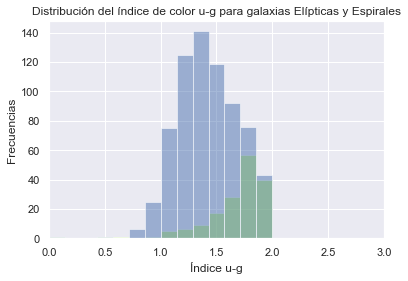

In [9]:
# Se grafica la Distribución del índdice de color u-g para los dos tipos galácticos.

plt.title('Distribución del índice de color u-g para galaxias Elípticas y Espirales')
plt.xlabel('Índice u-g')
plt.ylabel('Frecuencias')
plt.xlim(0,3)
plt.hist(id_elip_ug, bins=np.linspace(0,2.0,15), alpha=0.5, label='u-g', color = 'greenyellow')
plt.hist(id_sp_ug, bins=np.linspace(0,2.0,15),alpha=0.5,label='g-r')
plt.show()

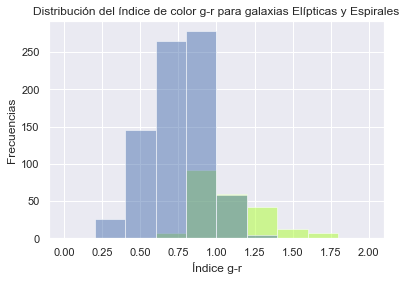

In [10]:
# Se grafica la Distribución del índdice de color g-r para los dos tipos galácticos.

plt.title('Distribución del índice de color g-r para galaxias Elípticas y Espirales')
plt.xlabel('Índice g-r')
plt.ylabel('Frecuencias')
heli = plt.hist(id_elip_gr, bins=np.linspace(0, 2.0,11), alpha=0.5, label='u-g', color = 'greenyellow')
hsp = plt.hist(id_sp_gr, bins=np.linspace(0, 2.0,11), alpha=0.5, label='g-r')
plt.show()

### Método de Kolmogorov-Smirnov ###  

Si se considera el caso donde las propiedades estadísticas de una muestra obtenidas a partir de experimentos repetidos usando variables aleatorias continuas, se quiere comparar con una función distribución de probabilidades $ F_{X} $. Uno podría, en principio, comparar un histograma y su correspondiente distribución de probabilidades bineada usando el método de chi-cuadrado. Desafortunadamente, el bineado es artificial y tiene gran influencia en los resultados. Consecuentemente, el método KS es más útil ya que no requiere de ningún bineado.  

El método compara funciones distribución $ F_{X} $ con funciones de distribución empíricas $ F_{\hat{X}} $ . Uno podría elegir diferentes maneras para comparar las distribuciones, por ejemplo, calcular el área entre las curvas $ F_{X} $ y $ F_{\hat{X}} $. El método KS eligió una simple medición: definir el valor máximo del modulo de la diferencia entre dos funciones de distribución acumuladas. Es decir, el estadístico es:

$$ d_{máx} = máx_{-\infty < x < \infty} |{F_{X}(x) − F_{\hat{X}}(x)}|  $$  

Así mismo, si se quiesieran comparar dos distribuciones acumuladas observadas, el estadístico sería:  

$$ d_{máx} = máx_{-\infty < x < \infty} |{F_{\hat{X_1}}(x) − F_{\hat{X_2}}(x)}|  $$  

Lo que hace útil al método KS es que su distribución, en el caso de la hipótesis nula (datos extraídos de la misma distribución), puede ser calculada, al menos una aproximación,dando la significación de cualquier valor distinto de cero para dmax.  
Una característica del método KS es que es invariante bajo reparametrizaciones de la variable x, es decir, se puede comprimir o o alargar el eje x, y la distancia máxima permanecera invariante.   
La bondad del método KS se construye usando un valor crítico. Por lo tanto, la hipótesis nula es rechazada a nivel $\alpha $ si  

$$ d^{observ} _{max} > d^{\alpha}_{max} $$

donde $ d^{\alpha}_{max} $ se encuentra a patir de:  

$$ P(d_{max} \leq d^{\alpha}_{max}) = 1 − \alpha $$  

Además, los valores de $d^{\alpha}_{max}$ se extraen a partir de tablas.  

Se procederá ahora a utililizar el método KS para comparar las distribuciones de los índices de color 'u-g' y 'g-r' de las galaxias elipticas y espirales.


### Aplicación del método ###

Primero se plantearán las hipótesis, el desarrollo vale para los dos conjuntos de datos, indice 'u-g' y 'g-r'. 

$ H_{0}: $ No hay diferencias entre la distribuciones de índice de color para galaxias elípticas y espirales.  

$ H_{a}: $ Los valores observados de las frecuencias de los índices de color son diferentes para las galaxias elípticas y espirales  

Luego, se determina el Nivel de significación o confianza para realizar la prueba: $\alpha =$ 0,05  

- Zona de aceptación: Para todo valor de probabilidad mayor que 0.05, se acepta $ H_{0} $ y se rechaza $H_{a}$.
- Zona de rechazo: Para todo valor de probabilidad menor que 0.05, se rechaza $ H_{0} $ y se acepta $H_{a}$.  

Para la aplicación de la prueba estadística se utilizará la función 'ks_2samp' de scipy.stats. La función, calcula el estadístico Kolmogorov-Smirnov en 2 muestras. Es una prueba de dos caras para la hipótesis nula de que 2 muestras independientes se extraen de la misma distribución continua. La hipótesis alternativa puede ser 'bilateral' (predeterminado), 'menor' o 'mayor'.  
Lo que devuelve esta ks es el estadístico de prueba 'KS' ( $d^{observ} _{max}$ ) y además el 'valor de p'.  

Una vez obtenido el valor de **p** para cada grupo de datos, es decir para la distribuciones 'u-g' y las distribuciones 'g-r', se compara el mismo con el valor de $\alpha$ y se decide la conclusión correspondiente en cada caso.  

A continuación se realizarán los cálculos: 

In [11]:
#Nivel de confianza para el análisis

a = 0.05

In [12]:
#Para el índice de color 'u-g' se tiene que: 

KS_ug, p_ug = scipy.stats.ks_2samp(id_elip_ug, id_sp_ug)

In [13]:
#Se visualizan los valores obtenidos
KS_ug, p_ug

(0.45629911883781854, 2.9713649935374405e-33)

In [14]:
#Para el índice de color 'g-r' se tiene que: 

KS_gr, p_gr = scipy.stats.ks_2samp(id_elip_gr, id_sp_gr)

In [15]:
#Se visualizan los valores obtenidos
KS_gr, p_gr

(0.5958677733955239, 7.8255084214824425e-59)

In [16]:
# Ahora se realiza la comparación de cada valor p con alfa 

p_ug <  0.05

True

In [17]:
p_gr < 0.05

True

### Conclusiones ###
Finalmente se verifica que los valores de p, tanto para el índice de color u-g como para el índice de color g-r, son menores que el nivel de significancia $\alpha$. Es decir que se rechaza la $H_{0}$ en ambos casos a favor de la $H_{a}$.  
Con esta prueba se verifica que las galaxias elipticas y espirales no son del mismo color con un nivel de confianza del 95%.  
Además de los histogramas realizados en el principio del análisis, se puede ver que las galaxias elípticas tienen valores de u-g y g-r mayores que los de las galaxias espirales lo que quiere decir que su color es en general hacia el rojo. Mientras que con las galaxias espirales pasa lo contrario y parecen ser más azules. 